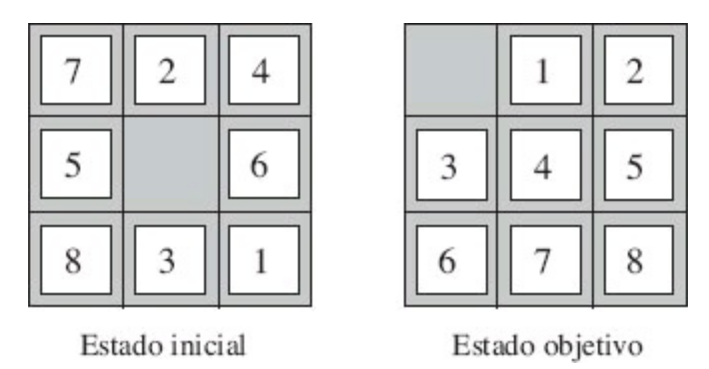

# **Implementação do Problema do Quebra-cabeças de 8 peças**

In [ ]:
import numpy as np
from copy import deepcopy

class No:
  def __init__(self, estado, pai, nivel, acaoGeradora):  
    self.estado = estado
    self.pai = pai
    self.nivel = nivel
    self.acaoGeradora = acaoGeradora

  def __encontreVazio(self):
    for i in range(len(self.estado)):
      for j in range(len(self.estado[i])):
        if self.estado[i][j] == 0: return i, j

  def __ciclo(self):
    aux = self.pai
    while aux != None:
      if aux.estado == self.estado:
        return True
      else: aux = aux.pai
    return False

  def gereSucessores(self, detectaCiclo = True):
    sucessores=[]
    possiveis=[]
    linVazio,colVazio = self.__encontreVazio()
    # vazio para baixo
    if linVazio < len(self.estado)-1:
      novoEstado = deepcopy(self.estado)
      novoEstado[linVazio][colVazio],novoEstado[linVazio+1][colVazio] = novoEstado[linVazio+1][colVazio],novoEstado[linVazio][colVazio]
      possiveis.append( No(estado=novoEstado, pai=self, nivel=self.nivel+1, acaoGeradora='cima') )  # peça para cima
    # vazio para cima
    if linVazio > 0:
      novoEstado = deepcopy(self.estado)
      novoEstado[linVazio][colVazio],novoEstado[linVazio-1][colVazio] = novoEstado[linVazio-1][colVazio],novoEstado[linVazio][colVazio]
      possiveis.append( No(estado=novoEstado, pai=self, nivel=self.nivel+1, acaoGeradora='baixo') )  # peça para baixo
    # vazio para direita
    if colVazio < len(self.estado[0])-1:
      novoEstado = deepcopy(self.estado)
      novoEstado[linVazio][colVazio],novoEstado[linVazio][colVazio+1] = novoEstado[linVazio][colVazio+1],novoEstado[linVazio][colVazio]
      possiveis.append( No(estado=novoEstado, pai=self, nivel=self.nivel+1, acaoGeradora='esquerda') )  # peça para esquerda
    # vazio para esquerda
    if colVazio > 0:
      novoEstado = deepcopy(self.estado)
      novoEstado[linVazio][colVazio],novoEstado[linVazio][colVazio-1] = novoEstado[linVazio][colVazio-1],novoEstado[linVazio][colVazio]
      possiveis.append( No(estado=novoEstado, pai=self, nivel=self.nivel+1, acaoGeradora='direita') )  # peça para direita

    for e in possiveis:
      if detectaCiclo:
        if not e.__ciclo():
          sucessores.append(e)
      else:
        sucessores.append(e)
    return sucessores

  def label(self):
    return str(np.array(self.estado))

**Busca em Largura**

In [ ]:
from graphviz import Digraph
# Create Digraph object
dot = Digraph()

def buscaLargura(estadoInicial, estadoObjetivo):
  global dot

  fila = [ No(estado=estadoInicial, pai=None, nivel=0, acaoGeradora=None) ]

  while len(fila) > 0:
    no = fila.pop(0)  # retiro o primeiro da fila
    if(no.pai != None):
      dot.node(str(no.pai), no.pai.label())
      dot.node(str(no), no.label())
      dot.edge(str(no.pai), str(no), no.acaoGeradora)
      #print('De:\n', no.pai.label(), '\nPara:\n', no.label(), '  -> Ação: ', no.acaoGeradora, '\n', sep='')
    if no.estado == estadoObjetivo:  # teste de objetivo
      print('Achei a solução!!')
      dot.node(str(no), no.label(), style='filled',fillcolor='yellow')
      print('Caminho com', len(caminho(no))-1, 'passos')
      break
    else:
      sucessores = no.gereSucessores(detectaCiclo=True)
      fila.extend(sucessores)  # coloco os sucessores no fim da fila

def caminho(no):
  resp = []
  while no != None:
    resp.append(no.label())
    no = no.pai  # suba na árvore em direção ao no inicial
  resp.reverse()  # quero o caminho do início para o fim
  return resp

In [ ]:
inicio = [[0,2,3],[1,5,8],[4,6,7]]
objetivo = [[1,2,3],[4,0,5],[6,7,8]]
#objetivo = [[1,2,3],[4,5,6],[7,8,0]]  # solução não encontrada com busca em profundidade

In [ ]:
buscaLargura(inicio, objetivo)

Achei a solução!!
Caminho com 6 passos


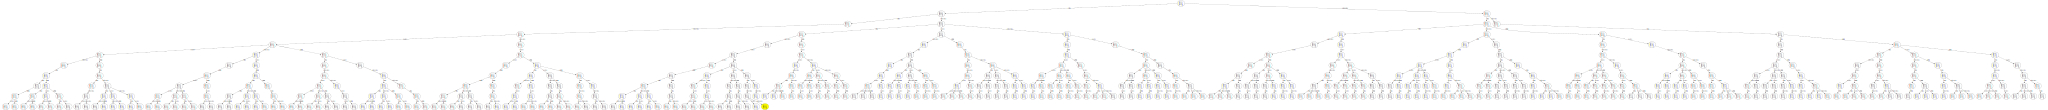

In [ ]:
dot

In [ ]:
dot.render('arvoreBuscaLargura')

'arvoreBuscaLargura.pdf'

**Busca em Profundidade**

In [ ]:
from graphviz import Digraph
# Create Digraph object
dot = Digraph()

def buscaProfundidade(estadoInicial, estadoObjetivo):
  global dot

  pilha = [ No(estado=estadoInicial, pai=None, nivel=0, acaoGeradora=None) ]

  while len(pilha) > 0:
    no = pilha.pop()  # retiro o último da lista, ou seja, o primeiro da pilha
    if(no.pai != None):
      dot.node(str(no.pai), no.pai.label())
      dot.node(str(no), no.label())
      dot.edge(str(no.pai), str(no), no.acaoGeradora)
      #print('De:\n', no.pai.label(), '\nPara:\n', no.label(), '  -> Ação: ', no.acaoGeradora, '\n', sep='')
    if no.estado == estadoObjetivo:  # teste de objetivo
      print('Achei a solução!!')
      dot.node(str(no), no.label(), style='filled',fillcolor='yellow')
      print('Caminho com', len(caminho(no))-1, 'passos')
      break
    else:
      sucessores = no.gereSucessores(detectaCiclo=True)
      pilha.extend(sucessores)  # coloco os sucessores no topo da pilha
      if len(pilha) > 200: # soluções muito longas
        print('Pilha atingiu 200 elementos... busca interrompida')
        break


In [ ]:
buscaProfundidade(inicio, objetivo)

Achei a solução!!
Caminho com 34 passos


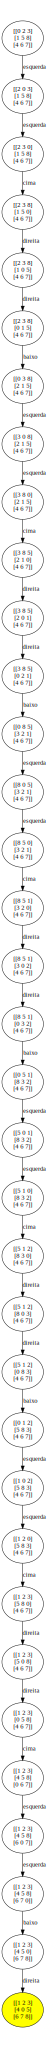

In [ ]:
dot

In [ ]:
dot.render('arvoreBuscaProfundidade')